# Debug iceberg error when using existing 1/8 restarts.

TBW

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# This is my main development dir; where this crap happens atm
path = '/gpfsm/dhome/jjbuseck/jjbuseck/models/MOM6_dev/geoclim-mom6/MOM6_SIS2_COBALT/BOM_0125_JRA_1.3/INPUT'

<xarray.Dataset>
Dimensions:  (nx: 2880, ny: 2240)
Dimensions without coordinates: nx, ny
Data variables:
    mask     (ny, nx) float64 ...
Attributes:
    grid_version:  0.2
    code_version:  $Name:  $
    history:       /net2/nnz/FRE-NCtools/build.fre-nctools.gfdl-ws.all.DESy0/...


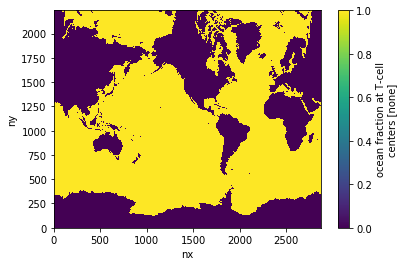

In [3]:
# load ocean mask
mask = xr.open_dataset(os.path.join(path, 'ocean_mask.nc'))
print(mask)
mask.mask.plot()

<xarray.Dataset>
Dimensions:              (Time: 1, xaxis_1: 2880, yaxis_1: 2240, zaxis_1: 10)
Coordinates:
  * yaxis_1              (yaxis_1) float64 1.0 2.0 3.0 ... 2.239e+03 2.24e+03
  * xaxis_1              (xaxis_1) float64 1.0 2.0 3.0 ... 2.879e+03 2.88e+03
  * zaxis_1              (zaxis_1) float64 1.0 2.0 3.0 4.0 ... 7.0 8.0 9.0 10.0
  * Time                 (Time) float64 1.0
Data variables:
    stored_ice           (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    stored_heat          (Time, yaxis_1, xaxis_1) float64 ...
    iceberg_counter_grd  (Time, yaxis_1, xaxis_1) float64 ...
Attributes:
    jb_notes:  Combined using xarray by Julius Busecke. See https://github.co...


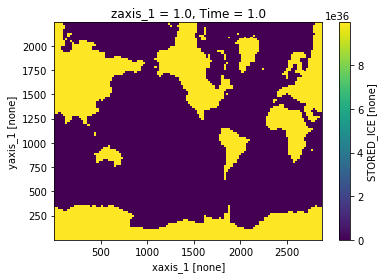

In [4]:
# load the calving restart file
calving = xr.open_dataset(os.path.join(path, 'calving.res.nc'))
print(calving)



calving.stored_ice.isel(zaxis_1=0).plot()

<xarray.DataArray 'mask' (yaxis_1: 2240, xaxis_1: 2880)>
[6451200 values with dtype=float64]
Dimensions without coordinates: yaxis_1, xaxis_1
Attributes:
    standard_name:  ocean fraction at T-cell centers
    units:          none


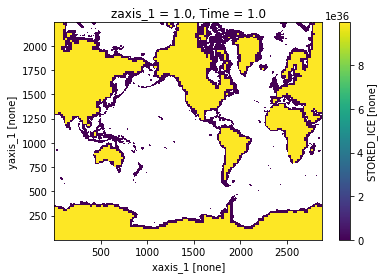

In [5]:
# convert dimensions of mask to calving file
mask_calving = mask.mask.rename({'nx':'xaxis_1', 'ny':'yaxis_1'})
print(mask_calving)
calving.stored_ice.isel(zaxis_1=0).where(mask_calving==0).plot()

# How does a 'working' file look?

In [6]:
# The 1 sec run 
path = '~/jjbuseck/model_setups/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/archive/restart_init_bgc_from_rest_1sec/'

<xarray.Dataset>
Dimensions:              (Time: 1, xaxis_1: 2880, yaxis_1: 2240, zaxis_1: 10)
Coordinates:
  * xaxis_1              (xaxis_1) float64 1.0 2.0 3.0 ... 2.879e+03 2.88e+03
  * yaxis_1              (yaxis_1) float64 1.0 2.0 3.0 ... 2.239e+03 2.24e+03
  * zaxis_1              (zaxis_1) float64 1.0 2.0 3.0 4.0 ... 7.0 8.0 9.0 10.0
  * Time                 (Time) float64 1.0
Data variables:
    stored_ice           (Time, zaxis_1, yaxis_1, xaxis_1) float64 ...
    stored_heat          (Time, yaxis_1, xaxis_1) float64 ...
    iceberg_counter_grd  (Time, yaxis_1, xaxis_1) float64 ...
Attributes:
    filename:  RESTART/calving.res.nc


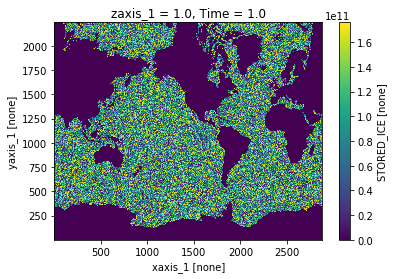

In [7]:
# load the calving restart file
calving = xr.open_dataset(os.path.join(path, 'calving.res.nc'))
print(calving)
calving.stored_ice.isel(zaxis_1=0).plot()

<xarray.DataArray 'mask' (yaxis_1: 2240, xaxis_1: 2880)>
[6451200 values with dtype=float64]
Dimensions without coordinates: yaxis_1, xaxis_1
Attributes:
    standard_name:  ocean fraction at T-cell centers
    units:          none


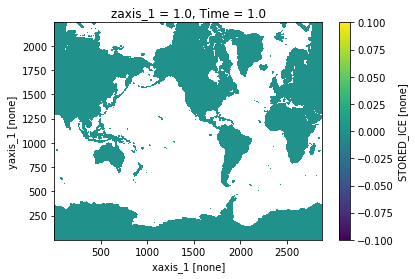

In [8]:
# convert dimensions of mask to calving file
mask_calving = mask.mask.rename({'nx':'xaxis_1', 'ny':'yaxis_1'})
print(mask_calving)
calving.stored_ice.isel(zaxis_1=0).where(mask_calving==0).plot()

<xarray.DataArray 'mask' (yaxis_1: 2240, xaxis_1: 2880)>
[6451200 values with dtype=float64]
Dimensions without coordinates: yaxis_1, xaxis_1
Attributes:
    standard_name:  ocean fraction at T-cell centers
    units:          none


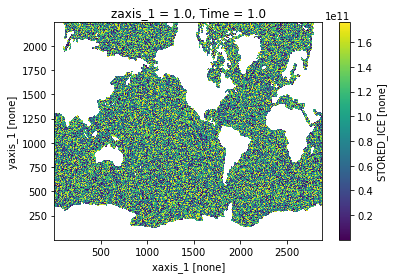

In [10]:
# convert dimensions of mask to calving file
mask_calving = mask.mask.rename({'nx':'xaxis_1', 'ny':'yaxis_1'})
print(mask_calving)
calving.stored_ice.isel(zaxis_1=0).where(mask_calving).plot()